## QGIS Assignment: Rhysea

Note: I am working on the LA demographics dataset!

#### Import Python Tools

In [2]:
%load_ext lab_black
import pandas as pd
import geopandas as gpd
import numpy as np

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


#### Load Data

In [3]:
# Values:https://raw.githubusercontent.com/stiles/usc/main/data/processed/la_neighborhood_demographics.csv
# Geo: https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson

In [8]:
demograph_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/usc/main/data/processed/la_neighborhood_demographics.csv"
)

In [11]:
la_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/usc/main/data/geo/la-neighborhoods.geojson"
)

#### Read data

In [12]:
demograph_df.head()

,name,total_population,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,asians_all,other_all,white_percent,black_percent,american_indian_percent,asian_percent,native_hawaiian_percent,other_percent,two_or_more_races_percent,latino_percent,asians_all_percent,other_all_percent,nonwhite_percent,majority_nonwhite,majority_white,majority_black,majority_american_indian_and_alaska_native,majority_asian,majority_native_hawaiian,majority_other,majority_two_or_more_races,majority_latino,median_householdincome,total_occupied_housing_units,owner_occupied,renter_occupied,owner_percent,renter_percent,majority_owner,majority_renter,majorityhigherthanmedianincomeLA
0,Acton,13533.0,3029.552482,43.082892,9.114016,122.284944,0.280278,0.168167,64.192933,1018.768948,122.565222,73.475116,0.223864,0.003184,0.000673,0.009036,0.000021,0.000012,0.004743,0.075280,0.009057,0.005429,0.776136,True,False,False,False,False,False,False,False,False,99453.506605,1474.265218,1329.164851,145.100367,0.901578,0.098422,True,False,True
1,Adams-Normandie,37987.0,1455.331389,3600.780013,5.886652,1621.694883,61.673873,32.257990,272.512175,11751.163222,1683.368756,310.656818,0.038311,0.094790,0.000155,0.042691,0.001624,0.000849,0.007174,0.309347,0.044314,0.008178,0.961689,True,False,False,False,False,False,False,False,False,37419.270130,5437.575802,1123.870291,4313.705512,0.206686,0.793314,False,True,False
2,Agoura Hills,27220.0,9336.980458,414.665537,0.000000,1054.881212,0.000000,32.058492,418.461988,1547.696671,1054.881212,450.520480,0.343019,0.015234,0.000000,0.038754,0.000000,0.001178,0.015373,0.056859,0.038754,0.016551,0.656981,True,False,False,False,False,False,False,False,False,121211.788628,4675.116219,3311.101230,1364.014989,0.708239,0.291761,True,False,True
3,Agua Dulce,17982.0,3430.950690,84.117674,29.477971,176.259175,2.276182,4.267842,130.656334,1025.422432,178.535357,164.402147,0.190799,0.004678,0.001639,0.009802,0.000127,0.000237,0.007266,0.057025,0.009929,0.009143,0.809201,True,False,False,False,False,False,False,False,False,108312.326136,1490.569409,1408.056410,82.512999,0.944643,0.055357,True,False,True
4,Alhambra,105896.0,3511.362136,809.817692,108.877418,19403.221726,191.097366,149.398101,773.197164,15428.325788,19594.319091,1031.472682,0.033159,0.007647,0.001028,0.183229,0.001805,0.001411,0.007301,0.145693,0.185034,0.009740,0.966841,True,False,False,False,False,False,False,False,False,61884.537960,13840.151455,5937.368580,7902.782874,0.428996,0.571004,False,True,False


In [13]:
la_gdf.head()

,name,slug,county,type,city,region,geometry
0,Vermont Square,vermont-square,los-angeles,Los Angeles,los-angeles,south-la,"POLYGON ((-118.28273 34.01114, -118.28207 34.0..."
1,Arlington Heights,arlington-heights,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.31672 34.05250, -118.31649 34.0..."
2,Bel-Air,bel-air,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.46076 34.13033, -118.46068 34.1..."
3,Beverly Crest,beverly-crest,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.45139 34.13176, -118.45116 34.1..."
4,Beverlywood,beverlywood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.39426 34.05244, -118.39317 34.0..."


<AxesSubplot:>

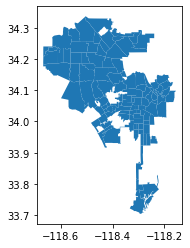

In [14]:
la_gdf.plot()

#### Merge Data

In [15]:
la_demograph_gdf = pd.merge(la_gdf, demograph_df, left_on="name", right_on="name")

In [16]:
la_demograph_gdf.head()

,name,slug,county,type,city,region,geometry,total_population,white_alone,black_alone,american_indian_and_alaska_native,asian_alone,native_hawaiian_and_pacific_islander,other_alone,two_or_more_races,latino_alone,asians_all,other_all,white_percent,black_percent,american_indian_percent,asian_percent,native_hawaiian_percent,other_percent,two_or_more_races_percent,latino_percent,asians_all_percent,other_all_percent,nonwhite_percent,majority_nonwhite,majority_white,majority_black,majority_american_indian_and_alaska_native,majority_asian,majority_native_hawaiian,majority_other,majority_two_or_more_races,majority_latino,median_householdincome,total_occupied_housing_units,owner_occupied,renter_occupied,owner_percent,renter_percent,majority_owner,majority_renter,majorityhigherthanmedianincomeLA
0,Vermont Square,vermont-square,los-angeles,Los Angeles,los-angeles,south-la,"POLYGON ((-118.28273 34.01114, -118.28207 34.0...",71469.0,983.023467,13503.105083,55.902474,724.002331,0.000000,393.233170,404.829453,37245.682133,724.002331,853.965097,0.013755,0.188937,7.821919e-04,0.010130,0.000000,0.005502,0.005664,0.521145,0.010130,0.011949,0.986245,True,False,False,False,False,False,False,False,True,41822.928950,14214.295664,4898.366783,9315.928882,0.344608,0.655392,False,True,False
1,Arlington Heights,arlington-heights,los-angeles,Los Angeles,los-angeles,central-la,"POLYGON ((-118.31672 34.05250, -118.31649 34.0...",44180.0,1196.494911,3185.189957,31.125602,4508.551244,49.408284,12.180941,323.267432,12013.558699,4557.959527,366.573974,0.027082,0.072096,7.045179e-04,0.102050,0.001118,0.000276,0.007317,0.271923,0.103168,0.008297,0.972918,True,False,False,False,False,False,False,False,False,42578.039781,7102.413584,1356.310928,5746.102656,0.190965,0.809035,False,True,False
2,Bel-Air,bel-air,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.46076 34.13033, -118.46068 34.1...",36105.0,5236.696004,206.303619,0.132539,673.387316,0.149772,0.187506,464.385694,285.427796,673.537089,464.705739,0.145041,0.005714,3.670931e-06,0.018651,0.000004,0.000005,0.012862,0.007905,0.018655,0.012871,0.854959,True,False,False,False,False,False,False,False,False,200418.552607,2768.149731,2284.649012,483.500719,0.825334,0.174666,True,False,True
3,Beverly Crest,beverly-crest,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.45139 34.13176, -118.45116 34.1...",33052.0,5575.862964,126.402255,0.026123,331.537402,0.000000,0.039668,127.941538,246.849875,331.537402,128.007329,0.168700,0.003824,7.903622e-07,0.010031,0.000000,0.000001,0.003871,0.007469,0.010031,0.003873,0.831300,True,False,False,False,False,False,False,False,False,181637.747622,2647.946141,2414.251796,233.694345,0.911745,0.088255,True,False,True
4,Beverlywood,beverlywood,los-angeles,Los Angeles,los-angeles,westside,"POLYGON ((-118.39426 34.05244, -118.39317 34.0...",29704.0,5526.500729,128.003029,0.000000,489.848538,0.402517,7.904090,156.039551,462.484081,490.251054,163.943641,0.186052,0.004309,0.000000e+00,0.016491,0.000014,0.000266,0.005253,0.015570,0.016505,0.005519,0.813948,True,False,False,False,False,False,False,False,False,131530.784216,2590.068534,1625.398241,964.670293,0.627550,0.372450,True,False,True


<AxesSubplot:>

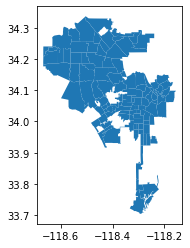

In [17]:
la_demograph_gdf.plot()

In [18]:
la_demograph_gdf.to_file(
    "../data/geo/la_demographics_geofile.geojson", driver="GeoJSON"
)